In [143]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from datetime import datetime
from utils import attribute_utils
pd.set_option('display.max_columns', None)
%reload_ext autoreload
%autoreload 2

In [2]:
data = pd.read_excel('datasets/DADOS IA SCC.xlsx')
data

,ANO,MÊS,TERRITÓRIO,AIS,NATUREZA A ANALISAR,ENVIADO PARA RELINT / PRONT. FT VIDAS,NOME,VULGO,SEXO,NOME DO PAI,NOME DA MÃE,DATA DE NASCIMENTO,IDADE,N º RG,ÓRGÃO EXPEDIDOR,ESTADO EXPEDIDOR,NATURALIDADE (Cidade),NATURALIDADE (UF),CPF,ENDEREÇO DO ALVO,FOTOS,RG NO SISTEMA,PRONTUÁRIO IITB,COMARCA,Nº DO PROCESSO JUDICIAL,PROCESSO EM SEGREDO DE JUSTIÇA,DATA DA ÚLTIMA MOVIMENTAÇÃO DO PROCESSO,TIPO DE PRISÃO DECRETADA,DATA EXPEDIÇÃO DO MANDADO,TIPIFICAÇÃO,SITUAÇÃO DO MANDADO,CÓPIA DO MANDADO,VÍTIMA,BAIRRO DO FATO,DATA DO FATO,Nº BOE - INFOPOL,TOTAL DE VÍTIMAS-CONSUMADO,TOTAL DE VÍTIMAS-TENTADO,CIVIL,CARCERÁRIO,CRIMINAL,CAPTURAS,CNJ,TJPE,INFOPOL,INFOSEG,SEC. SAÚDE,GACE,ALVO PRIORITÁRIO,SITE SDS,BI CVLI,BI TENTATIVA-CVLI,BI NARCOTRÁFICO,BI CVP,BI OUTROS,SUBTOTAL BI,MP CVLI,MP TENTATIVA-CVLI,MP NARCOTRÁFICO,MP CVP,MP OUTROS,SUBTOTAL MP,PROCESSO CVLI,PROCESSO TENTATIVA-CVLI,PROCESSO NARCOTRÁFICO,PROCESSO CVP,PROCESSO OUTROS,SUBTOTAL PROCESSOS,PERICULOSIDADE (BI - MP - PROCESSO),STATUS CARCERÁRIO,DATA DA PRISÃO ou REGISTRO NO CARCERÁRIO,DATA DA ÚLTIMA MOVIMENTAÇÃO NO CARCERÁRIO,UNIDADE PRISIONAL ATUAL,PRONTUÁRIO SERES,DATA DE EVASÃO DO SISTEMA CARCERÁRIO,DATA DA EXPEDIÇÃO DO ALVARÁ,MOTIVO DA SOLTURA,OUTROS PROCESSOS NO TJPE,QUANTIDADE DE PROCESSOS NO TJPE,DATA ÚLTIMA ATUALIZAÇÃO,OBSERVAÇÕES,Mandados inseridos (CVLI) para análise (marcador)
0,2017,FEVEREIRO,07 - SERTÃO 1,19,121-CPB,NaN,XXXXXX XXXXXX XX XXXXXX,DEL DE PORFÍRIO,MASCULINO,NÃO DECLARADO,AAAAA AA AAAAAA AAAAAAA,1956-06-06 00:00:00,62.0,6074069.0,SSP,PE,-,-,XXX.XXX.XXX-XX,"RUA GERSON MARANHÃO, 7,LIMOEIRO - PE",NÃO,NÃO,A SOLICITAR,ITAÍBA,0003465-35.2017.8.12.0750,NÃO,2018-05-10 00:00:00,PREVENTIVA,2017-02-22,ART. 121 (HOMICÍDIO),ATIVO,POSSUI,ZZZZZ ZZZZZZ ZZZ,ZONA RURAL,2016-09-23 00:00:00,XXX,2.0,0.0,NaN,NaN,NaN,NaN,X,X,X,X,NaN,NaN,X,NaN,0.0,0.0,0.0,0.0,0.0,0,2.0,0.0,0.0,0.0,0.0,10,2.0,0.0,0.0,0.0,0.0,10,8,SEM REGISTRO,NaN,NaN,NaN,-,NaN,NaN,NaN,00042340056-73.2017.8.17.0750 (Homicídio Quali...,2.0,2018-08-21,NaN,1.0
1,2013,MARÇO,EVADIDOS,EVADIDOS,Cód. Penal: 157 § 3,NaN,XXXXXX XXXXXX XX XXXXXX OU XXXXXX YYYYYY YYYYY...,-,MASCULINO,NÃO DECLARADO,XXX XXXXXX XX XXXXXX,1974-12-22 00:00:00,43.0,5110928.0,SDS,PE,CABROBÓ,PE,NaN,"RUA FLORENTINA DE SÁ, 188, SUBESTAÇÃO, CARPINA...",SIM,SIM,POSSUI,EVADIDOS,2001.0184.002311323423,NÃO,2015-09-10 00:00:00,CONDENATÓRIA,2013-03-05,ART. 157 §3° (LATROCÍNIO),ATIVO,POSSUI,-,-,1997-10-05 00:00:00,-,1.0,0.0,X,X,NaN,X,NaN,X,NaN,X,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0,1.0,0.0,0.0,0.0,0.0,5,1.0,0.0,0.0,0.0,0.0,5,4,PRESO,-,-,PDEG - PENITENCIÁRIA DR. EDVALDO GOMES,14000063,19/08/15,NaN,-,390333438_92.1997.8.07.0004 (LATROCÍNIO) GAMA ...,NaN,2015-08-31,-,1.0
2,2012,DEZEMBRO,06 - AGRESTE 2,18,ART. 121 (Homicidio),NaN,ZZZZZZZZZZZZ ZZZZZZZZZZZ ZZ ZZZZZZZZZZ,XXXXXXX,MASCULINO,NÃO DECLARADO,ZZZZZZZZZZZZ ZZZZZZZZZZZ ZZ ZZZZZZZZZZ,1948-08-24 00:00:00,70.0,NaN,NaN,NaN,CAETÉS,PE,YYY.YYY.YYY-YY,SITIO VARZEA SUJA IGARASSU,NÃO,NÃO,NaN,CAETÉS,00626-18.2234.8.17.0400,NÃO,2013-01-25 00:00:00,PREVENTIVA,2012-12-14,ART. 121 (HOMICÍDIO),CUMPRIDO,POSSUI,TTTTTTTT TTTTT TTTTTTTT,SITIO BARRIGUDA,2012-10-01 00:00:00,DDD,1.0,NaN,NaN,X,X,NaN,NaN,X,NaN,X,NaN,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN,20,NaN,NaN,NaN,NaN,NaN,0,1.0,NaN,NaN,NaN,NaN,5,5,PRESO,2012-12-21 00:00:00,2012-12-21 00:00:00,CADEIA PÚBLICA,78400088,NaN,NaN,NaN,NaN,1.0,2013-01-29,NaN,1.0
3,2007,NaN,EVADIDOS,EVADIDOS,"157 § 2, 157 §2, 14",NaN,WWWWWWW WW WWW WWWWWW,MIDIEL,MASCULINO,NÃO DECLARADO,ZZZZ ZZZZZZZZZZZ ZZ ZZZZZZZZZZ,1976-06-17 00:00:00,42.0,NaN,NaN,NaN,NaN,NaN,NaN,"QUARTA TRAVESSA RIO TAPAJÓS, 795, FOSFATO,FLOR...",SIM,NÃO,NaN,EVADIDOS,2007018413454,NaN,NaN,NaN,NaT,NaN,CUMPRIDO,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,X,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,0,0,PRESO,2013-04-15 00:00:00,NaN,PI - PRESÍDIO DE IGARASSU,2011546,2013-04-03 00:00:00,NaN,NaN,NaN,NaN,NaT,NaN,NaN
4,2013,JUNHO,07 - SERTÃO 1,19,121 C/C 14-CPB,NaN,XXXXXX XXXXXX XX/WWW XXXXXX XX/UUUUUU UU UUUUU

In [7]:
def relevancyData(row):
    functions = [attribute_utils.evadido, attribute_utils.diasAposEvasao, attribute_utils.periculosidade, attribute_utils.prioritario, attribute_utils.qtdProcessos, attribute_utils.totalVitmasConsumado, attribute_utils.totalVitmasTentado, attribute_utils.prisaoPreventiva, attribute_utils.prisaoCondenatoria, attribute_utils.mpCVLI]
    return pd.Series([function(row) for function in functions])
data.apply(relevancyData, axis=1)

,0,1,2,3,4,5,6,7,8,9
0,0.0,0.0,8.0,1.0,2.0,2.0,0.0,1.0,0.0,2.0
1,1.0,1186.0,4.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0
2,0.0,0.0,5.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0
3,1.0,2054.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,4.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


+ EV = Evadido {0,1}
+ ΔTev = Dias após evasão ℕ
+ P = Periculosidade ℤ
+ AP = Alvo prioritário {0,1}
+ QP = Quantidade processos ℕ
+ TVC = Total de vítimas - consumado ℕ
+ TVT = Total de vítimas - tentado ℕ
+ PP = Preventiva {0,1}
+ PC = Condenatória {0,1}
+ CVLImp = MP CVLI ℕ
+ Pcvli = Probabilidade de cometer CVLI [0,1]

+ EC = Endereço conhecido {0,1}
+ FT = Possui foto {0,1}
+ RG = RG no sistema {0,1}
+ PD = Prisão decretada {0,1}
+ ΔTexp = Dias após expedição ℕ
+ MA = Mandado ativo {0,1}
+ SC = Sistema carcerário (prontuário SERES) {0,1}

In [14]:
n=data['QUANTIDADE DE PROCESSOS NO TJPE'].iloc[0]

In [41]:
data[['PRONTUÁRIO SERES','CARCERÁRIO']]

,PRONTUÁRIO SERES,CARCERÁRIO
0,-,NaN
1,14000063,X
2,78400088,X
3,2011546,X
4,8006802,X
5,78700040,X


In [124]:
from fitness import FuncaoRelevancia, FuncaoViabilidade, FitnessSum, FitnessMult

In [125]:
Kr, Kv = np.ones(10), np.ones(7)
R = FuncaoRelevancia(Kr)
V = FuncaoViabilidade(Kv)
fitness1 = FitnessSum(1,1,1,Kr,Kv,data)
fitness2 = FitnessMult(1,1,1,Kr,Kv,data)
def fitnessInd(row):
    return (1-np.exp(-V(row)))*R(row)

In [126]:
pd.concat([data.apply(R, axis=1), data.apply(V, axis=1), data.apply(fitnessInd, axis=1)], axis=1)

,0,1,2
0,1.7,0.428571,0.592554
1,0.8,0.857143,0.460502
2,0.9,0.428571,0.313705
3,0.1,0.571429,0.043528
4,0.8,0.428571,0.278849
5,0.2,0.428571,0.069712


In [130]:
chr = [0,4,2,3]
fitness1(chr), fitness2(chr)

(1.3392857142857142, 0.30715884804840876)

In [51]:
chr = [1,0,4,2]
np.sum(data.iloc[chr].apply(R, axis=1).values)

4.2

In [133]:
from tests import testeGA

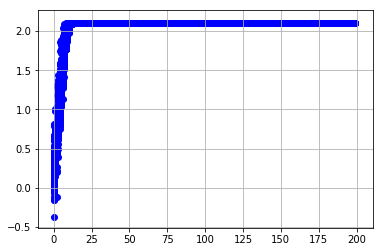

In [157]:
testeGA.testWithFakeFitness()